<H1>Dataset Loading and Interaction Extraction</h1>

In [29]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [30]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [31]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [32]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


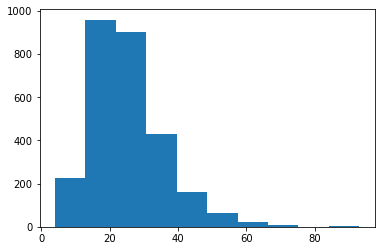

In [33]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [34]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [35]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 Cck
1 GbdDy
2 WrKSFxM
3 LvgrUtri
4 eNPAEj
5 UzDUeogI
6 KZpxnA
7 YVxUYuU
8 SbHhavN
9 MblvqVm


In [36]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA mRwynOY mRwynOY is a sentence'

In [37]:
proteins = ["Actin","Albumins","Alpha globulin","Arp2/3","Beta globulin","C-myc","C-reactive protein","C1-inhibitor","C3-convertase","CFTR","Cadherin","Calcium channels","Carboxypeptidase","Collagen","Coronin","Dystrphin","Elastin","Ependymin","Estrogen receptor","F-spondin","FOXP2","FOXP3","Factor VIII","Factor XIII","Ferritin","Fibrin","Fibronectin","Gamma globulin","Glucose transporter","Glycophorin D","GroEL ","Hemoglobin","Histones","Hydrolases","IgA","IgD","IgE","IgG","IgM","Insulin","Integrin","Keratin","Muscarinic acetylcholine receptor","MyoD","Myoglobin","Myosin","NCAM","Nebulin","Nicotinic acetylcholine receptor","Oxidoreductases","Oxytocin","P53","Pikachurin","Potassium channels","Protein C","Protein S","Protein Z","Protein Z-related protease inhibitor","Rhodopsin","Scramblase","Selectin","Serum Amyloid P Component","Serum albumin","Sodium channels","Spectrin","Tau","Thrombin","Titin","Transferases","Tropomyosin","Tubulin","Von Willebrand Factor"]

import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

0 Alpha globulin
1 IgA
2 FOXP3
3 F-spondin
4 Rhodopsin
5 Oxidoreductases
6 Nicotinic acetylcholine receptor
7 Ferritin
8 IgG
9 GroEL 


In [38]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [39]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [40]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        for i in range(10):
            sentence = sentence.replace('PROTEIN'+str(i),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [41]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB Beta globulin collagen types II Fibronectin and III IgE in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Myosin PROTEINB collagen types II Protein S and III Nicotinic acetylcholine receptor in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Carboxypeptidase Protein C collagen types II PROTEINB and III Ferritin in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for Alpha globulin Protein Z-related protease inhibitor collagen types II Nicotinic acetylcholine receptor and III PROTEINB in a growing "car

Here we show that PROTEINA and PROTEINB from human B lymphocytes can interact directly.

PROTEINA and PROTEINB coimmunoprecipitated from mature and activated B-cell lines, and gel-purified Thrombin and Arp2/3 reassociated in vitro, demonstrating their direct interaction.

PROTEINA and Potassium channels coimmunoprecipitated from mature and activated B-cell lines, and gel-purified PROTEINB and Protein C reassociated in vitro, demonstrating their direct interaction.

PROTEINA and Ependymin coimmunoprecipitated from mature and activated B-cell lines, and gel-purified C3-convertase and PROTEINB reassociated in vitro, demonstrating their direct interaction.

C1-inhibitor and PROTEINA coimmunoprecipitated from mature and activated B-cell lines, and gel-purified PROTEINB and Alpha globulin reassociated in vitro, demonstrating their direct interaction.

Coronin and PROTEINA coimmunoprecipitated from mature and activated B-cell lines, and gel-purified Dystrphin and PROTEINB reassociated in vitr


We had previously shown that the ubiquitous PROTEINA and the lymphoid-specific PROTEINB transcription factors stimulate transcription at the level of stable preinitiation complex formation.

We have therefore investigated whether the octamer binding proteins might physically interact with PROTEINA the PROTEINB component of the Oxytocin factor.

We have therefore investigated whether the octamer binding proteins might physically interact with PROTEINA the Elastin component of the PROTEINB factor.

We have therefore investigated whether the octamer binding proteins might physically interact with Actin the PROTEINA component of the PROTEINB factor.

By using several different experimental systems we show that PROTEINA efficiently associates with PROTEINB and CFTR

By using several different experimental systems we show that PROTEINA efficiently associates with MyoD and PROTEINB

By using several different experimental systems we show that Glucose transporter efficiently associates with P

Our analyses demonstrate that the PROTEINA Alpha globulin Pikachurin and PROTEINB proteins interact with each other.

Our analyses demonstrate that the Calcium channels PROTEINA PROTEINB and Serum Amyloid P Component proteins interact with each other.

Our analyses demonstrate that the Myosin PROTEINA Protein S and PROTEINB proteins interact with each other.

Our analyses demonstrate that the P53 C3-convertase PROTEINA and PROTEINB proteins interact with each other.

PROTEINA protein interacts with multiple subunits of PROTEINB and with Alpha globulin protein.

PROTEINA protein interacts with multiple subunits of Protein C and with PROTEINB protein.

CFTR protein interacts with multiple subunits of PROTEINA and with PROTEINB protein.

Residues in human PROTEINA PROTEINB crucial for binding to both the human Dystrphin (R) and C-myc were identified by analysis of alanine scanning mutants of Cadherin in assays for both receptor binding and bioactivity.

Residues in human PROTEINA Protein 

RESULTS: IgE PROTEINA Fibronectin and PROTEINB were expressed in a normal membranous pattern in all normal bladder epithelium specimens.

RESULTS: Histones Pikachurin PROTEINA and PROTEINB were expressed in a normal membranous pattern in all normal bladder epithelium specimens.

AIMS: To investigate the disturbance of intercellular adhesion in adenoid cystic carcinoma (ACC), we examined the ultrastructural localization of PROTEINA PROTEINB Spectrin P53 and Histones Selectin in ACC, and compared it with that in the normal labial gland.

AIMS: To investigate the disturbance of intercellular adhesion in adenoid cystic carcinoma (ACC), we examined the ultrastructural localization of PROTEINA Hydrolases PROTEINB C-reactive protein and Myosin Oxidoreductases in ACC, and compared it with that in the normal labial gland.

AIMS: To investigate the disturbance of intercellular adhesion in adenoid cystic carcinoma (ACC), we examined the ultrastructural localization of PROTEINA Von Willebrand Fact

PROTEINA PROTEINB repeat 10 to the COOH terminus of Protein Z is involved in binding to Glycophorin D whereas Thrombin interacts directly with the P53 domain of Integrin

PROTEINA Tubulin repeat 10 to the COOH terminus of PROTEINB is involved in binding to Hemoglobin whereas Insulin interacts directly with the Ferritin domain of Actin

PROTEINA Coronin repeat 10 to the COOH terminus of C-myc is involved in binding to PROTEINB whereas Serum Amyloid P Component interacts directly with the Transferases domain of Histones

PROTEINA FOXP3 repeat 10 to the COOH terminus of Scramblase is involved in binding to Tubulin whereas PROTEINB interacts directly with the Selectin domain of Keratin

PROTEINA Serum albumin repeat 10 to the COOH terminus of Gamma globulin is involved in binding to Nicotinic acetylcholine receptor whereas Oxytocin interacts directly with the PROTEINB domain of Muscarinic acetylcholine receptor

PROTEINA Serum albumin repeat 10 to the COOH terminus of Rhodopsin is involved

To detect the expression of apoptosis-related molecules, Fibronectin protection assay was used with specific antisense RNA probes for PROTEINA Integrin Tropomyosin Fibrin Alpha globulin Insulin PROTEINB Tau Myosin and Fibronectin

To detect the expression of apoptosis-related molecules, Rhodopsin protection assay was used with specific antisense RNA probes for PROTEINA Rhodopsin Muscarinic acetylcholine receptor Tau Potassium channels Myoglobin IgM PROTEINB F-spondin and Rhodopsin

To detect the expression of apoptosis-related molecules, Myoglobin protection assay was used with specific antisense RNA probes for PROTEINA Rhodopsin Albumins Coronin NCAM Actin Ependymin Nicotinic acetylcholine receptor PROTEINB and Myoglobin

To detect the expression of apoptosis-related molecules, PROTEINB protection assay was used with specific antisense RNA probes for PROTEINA Tau IgG Tau IgD Glycophorin D Nebulin Coronin NCAM and PROTEINB

To detect the expression of apoptosis-related molecules, Serum

Lethality of the PROTEINB Glycophorin D and FOXP2 Oxidoreductases double mutants can also be rescued by mutations in the DNA damage checkpoint functions Albumins NCAM PROTEINA and Alpha globulin indicating that the NCAM Von Willebrand Factor and PROTEINB Glycophorin D mutant combinations lead to an intermediate that is sensed by these checkpoint functions.

Lethality of the Sodium channels PROTEINB and Nicotinic acetylcholine receptor Titin double mutants can also be rescued by mutations in the DNA damage checkpoint functions Nebulin Keratin PROTEINA and MyoD indicating that the Carboxypeptidase GroEL  and Sodium channels PROTEINB mutant combinations lead to an intermediate that is sensed by these checkpoint functions.

Lethality of the Tau Hydrolases and Serum Amyloid P Component Titin double mutants can also be rescued by mutations in the DNA damage checkpoint functions Protein C Histones FOXP3 and PROTEINA indicating that the PROTEINB Titin and Tau Hydrolases mutant combinations lea

Mutations in Saccharomyces cerevisiae PROTEINA Fibrin Integrin Beta globulin Insulin Pikachurin IgM Protein S and PROTEINB increased the rate of genome rearrangements up to 200-fold whereas mutations in Muscarinic acetylcholine receptor PROTEINA Fibrin Integrin and Beta globulin had little effect.

Mutations in Saccharomyces cerevisiae PROTEINA C-myc Sodium channels Tau Insulin IgG Integrin FOXP2 and F-spondin increased the rate of genome rearrangements up to 200-fold whereas mutations in PROTEINB PROTEINA C-myc Sodium channels and Tau had little effect.

Mutations in Saccharomyces cerevisiae PROTEINA Serum albumin Potassium channels Oxytocin CFTR IgE FOXP2 Protein Z-related protease inhibitor and F-spondin increased the rate of genome rearrangements up to 200-fold whereas mutations in Rhodopsin PROTEINA Serum albumin Potassium channels and Oxytocin had little effect.

Mutations in Saccharomyces cerevisiae PROTEINA PROTEINB Pikachurin Tau C3-convertase Histones MyoD Ferritin and NCAM i

Titin is generally thought to regulate PROTEINA polymerization, but the observation that acidic phospholipids dissociate the complex of PROTEINB and Potassium channels raised the possibility that Keratin might also regulate lipid metabolism.

Coronin is generally thought to regulate PROTEINA polymerization, but the observation that acidic phospholipids dissociate the complex of Serum Amyloid P Component and PROTEINB raised the possibility that Titin might also regulate lipid metabolism.

Oxidoreductases is generally thought to regulate PROTEINA polymerization, but the observation that acidic phospholipids dissociate the complex of Transferases and Glycophorin D raised the possibility that PROTEINB might also regulate lipid metabolism.

Factor VIII is generally thought to regulate C-reactive protein polymerization, but the observation that acidic phospholipids dissociate the complex of PROTEINA and PROTEINB raised the possibility that GroEL  might also regulate lipid metabolism.

Calciu

Sodium channels contains a binding motif for the PROTEINA PROTEINB as well as Protein S Protein S Serum albumin domains, but no specific C-myc structure regulated by NCAM IgA has been identified.

Beta globulin contains a binding motif for the PROTEINA Rhodopsin as well as PROTEINB Transferases Fibronectin domains, but no specific Protein Z-related protease inhibitor structure regulated by F-spondin C1-inhibitor has been identified.

Myosin contains a binding motif for the PROTEINA Spectrin as well as C-reactive protein PROTEINB Albumins domains, but no specific MyoD structure regulated by Scramblase Myosin has been identified.

Gamma globulin contains a binding motif for the PROTEINA Keratin as well as IgD Hydrolases PROTEINB domains, but no specific Transferases structure regulated by Beta globulin Hydrolases has been identified.

Tau contains a binding motif for the PROTEINA Keratin as well as Collagen Dystrphin Dystrphin domains, but no specific PROTEINB structure regulated by Arp2

We have examined the level of PROTEINA a Dystrphin and PROTEINB a Myosin in BALB/c 3T3 cells.

We have examined the level of PROTEINA a Tubulin and Fibrin a PROTEINB in BALB/c 3T3 cells.

We have examined the level of Oxytocin a PROTEINA and PROTEINB a FOXP2 in BALB/c 3T3 cells.

We have examined the level of Titin a PROTEINA and Fibrin a PROTEINB in BALB/c 3T3 cells.

We have examined the level of IgE a Histones and PROTEINA a PROTEINB in BALB/c 3T3 cells.

We have found that PROTEINA a 21-kDa PROTEINB is a component of these rods.

We have shown that the PROTEINA PROTEINB and IgG are potential targets of the Dystrphin family Myoglobin and bind to an Tau C-myc at their proline-rich FH1 domains to regulate reorganization of the Glycophorin D cytoskeleton in the yeast Saccharomyces cerevisiae.

We have shown that the PROTEINA Hydrolases and PROTEINB are potential targets of the Histones family Fibrin and bind to an IgG Hemoglobin at their proline-rich FH1 domains to regulate reorganizat

Characterization of EC and Protein S Serum Amyloid P Component bound to A beta (1-28) revealed strong binding by PROTEINA weak binding by Albumins and Albumins two dermatan sulfate proteoglycans, and lack of binding by Insulin PROTEINB a large chondroitin sulfate proteoglycan

Characterization of EC and Protein C Oxytocin bound to A beta (1-28) revealed strong binding by Rhodopsin weak binding by PROTEINA and PROTEINB two dermatan sulfate proteoglycans, and lack of binding by Keratin Albumins a large chondroitin sulfate proteoglycan

Characterization of EC and Coronin Calcium channels bound to A beta (1-28) revealed strong binding by C-reactive protein weak binding by PROTEINA and Serum Amyloid P Component two dermatan sulfate proteoglycans, and lack of binding by PROTEINB Gamma globulin a large chondroitin sulfate proteoglycan

Characterization of EC and Hemoglobin FOXP3 bound to A beta (1-28) revealed strong binding by F-spondin weak binding by PROTEINA and IgM two dermatan sulfate p

In [42]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [43]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


import gensim.models.keyedvectors as word2vec



print("Imports work")

Imports work


<h1>Embedding</h1>

In [44]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainSet)
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [45]:



def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            #EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
            EMBEDDING_FILE='glove.6B.300d.txt'
            #EMBEDDING_FILE='glove.840B.300d.txt'
            embed_size = 300#must be same as above
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
            embed_size = 300
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE='wiki-news-300d-1M.vec'
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE,encoding="utf8")
            for line in f:
                #split up line into an indexed array
                values = line.split()                 
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs #50 dimensions
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        
        
        '''
        counter = 0 
        for key,value in embeddings_index.items():
            
            #print(type(value))
            #print(value.shape)
            #print(value.shape[0])
            
            if value.shape!=(300,):
                print(value.shape)
                print()
        '''
        #Line to exclude wordvectors that aren't the right size
        embeddings_index = {key:value for key,value in embeddings_index.items() if value.shape==(embed_size,)}
        
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

     
print()
print('word2vec')
#embedding_matrix_word2vec = loadEmbeddingMatrix('word2vec')

print()
print('glove')    
#embedding_matrix_glove = loadEmbeddingMatrix('glove')

print()
print('fasttext')
#embedding_matrix_fasttext = loadEmbeddingMatrix('fasttext')


#del embedding_matrix_word2vec

#del embedding_matrix_glove

#del embedding_matrix_fasttext

#inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

#x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)




word2vec

glove

fasttext


<h1>Functional API</h1>

In [46]:

denseResults = []
CNNResults = []
LSTMResults = []

all_epochs_to_run  = 5
opt = 'adam'
learningRate = 1


lossType = 'binary_crossentropy'#"sparse_categorical_crossentropy" #"categorical_crossentropy" #'binary_crossentropy'

<h4>word2vec</h4>

In [47]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [48]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 559us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 6s 563us/step - loss: 0.5807 - accuracy: 0.7112
Epoch 4/5
10394/10394 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.72 - 6s 560us/step - loss: 0.5611 - accuracy: 0.7235
Epoch 5/5
10394/10394 [==============================] - 6s 561us/step - loss: 0.5467 - accuracy: 0.7337

Training done in 0.5046002785364787 minutes or 30.27601671218872 seconds now evaluating...

10394/10394 [==============================] - 2s 161us/step

2336/2336 [==============================] - 0s 160us/step


In [49]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 756us/step - loss: 0.5766 - accuracy: 0.7116
Epoch 3/5
10394/10394 [==============================] - 8s 746us/step - loss: 0.5350 - accuracy: 0.7365
Epoch 4/5
10394/10394 [==============================] - 8s 769us/step - loss: 0.5066 - accuracy: 0.7609
Epoch 5/5
10394/10394 [==============================] - 8s 744us/step - loss: 0.4811 - accuracy: 0.7815

Training done in 0.6693277716636657 minutes or 40.159666299819946 seconds now evaluating...

10394/10394 [==============================] - 1s 138us/step

2336/2336 [==============================] - 0s 133us/step


In [50]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.5425 - accuracy: 0.7221
Epoch 2/5
   96/10394 [..............................] - ETA: 13s - loss: 0.4621 - accuracy: 0.7604

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4623 - accuracy: 0.7648
Epoch 3/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.4238 - accuracy: 0.7911
Epoch 4/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3915 - accuracy: 0.8085
Epoch 5/5
10394/10394 [==============================] - 14s 1ms/step - loss: 0.3663 - accuracy: 0.8184

Training done in 1.196331544717153 minutes or 71.77989268302917 seconds now evaluating...

10394/10394 [==============================] - 8s 763us/step

2336/2336 [==============================] - 2s 753us/step


<h4>glove</h4>

In [51]:
embedding_matrix = loadEmbeddingMatrix('glove')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

Loaded 400000 word vectors.
total embedded: 4581 common words


In [52]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 570us/step - loss: 0.5864 - accuracy: 0.7087
Epoch 3/5
10394/10394 [==============================] - 6s 572us/step - loss: 0.5594 - accuracy: 0.7161
Epoch 4/5
10394/10394 [==============================] - 6s 574us/step - loss: 0.5379 - accuracy: 0.7313
Epoch 5/5
10394/10394 [==============================] - 6s 575us/step - loss: 0.5302 - accuracy: 0.7401

Training done in 0.5145823518435161 minutes or 30.874941110610962 seconds now evaluating...

10394/10394 [==============================] - 2s 165us/step

2336/2336 [==============================] - 0s 162us/step


In [53]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 745us/step - loss: 0.6040 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 8s 746us/step - loss: 0.5964 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 8s 746us/step - loss: 0.5742 - accuracy: 0.7128
Epoch 5/5
10394/10394 [==============================] - 8s 745us/step - loss: 0.5352 - accuracy: 0.73410s - loss: 0.5

Training done in 0.6686801155408223 minutes or 40.12080693244934 seconds now evaluating...

10394/10394 [==============================] - 1s 140us/step

2336/2336 [==============================] - 0s 136us/step


In [54]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5584 - accuracy: 0.7133
Epoch 2/5
   96/10394 [..............................] - ETA: 14s - loss: 0.5107 - accuracy: 0.7708

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 14s 1ms/step - loss: 0.4726 - accuracy: 0.7628
Epoch 3/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4258 - accuracy: 0.7889
Epoch 4/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3856 - accuracy: 0.8135
Epoch 5/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3500 - accuracy: 0.8319

Training done in 1.2325815002123515 minutes or 73.95489001274109 seconds now evaluating...

10394/10394 [==============================] - 8s 757us/step

2336/2336 [==============================] - 2s 753us/step


<h4>fasttext</h4>

In [55]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

vocab_size = len(tokenizer.word_index)
sentence_length = maxSentenceWords
wordvec_length = embedding_matrix.shape[1]


epochs_to_run = all_epochs_to_run
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 3000000 word vectors.
total embedded: 4169 common words


In [56]:
input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = GlobalMaxPooling1D()(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
dense_1 (Dense)              (None, 50, 2000)          602000    
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1000)          2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 50, 500)           500500    
_________________________________________________________________
dense_4 (Dense)              (None, 50, 200)           100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50)            1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 6s 565us/step - loss: 0.5929 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 6s 567us/step - loss: 0.5630 - accuracy: 0.7195
Epoch 4/5
10394/10394 [==============================] - 6s 566us/step - loss: 0.5412 - accuracy: 0.7378
Epoch 5/5
10394/10394 [==============================] - 6s 570us/step - loss: 0.5312 - accuracy: 0.7418

Training done in 0.5107319394747416 minutes or 30.643916368484497 seconds now evaluating...

10394/10394 [==============================] - 2s 165us/step

2336/2336 [==============================] - 0s 159us/step


In [57]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)

x = Reshape((sentence_length, wordvec_length,1))(x)


x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)


'''
x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''


output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 300, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 100, 100)      1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 25, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 25, 200)        0   

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 8s 736us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 3/5
10394/10394 [==============================] - 8s 743us/step - loss: 0.6022 - accuracy: 0.7108
Epoch 4/5
10394/10394 [==============================] - 8s 737us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 5/5
10394/10394 [==============================] - 8s 752us/step - loss: 0.6020 - accuracy: 0.7108

Training done in 0.6614132126172384 minutes or 39.6847927570343 seconds now evaluating...

10394/10394 [==============================] - 1s 138us/step

2336/2336 [==============================] - 0s 133us/step


In [58]:



input_layer = Input(shape=(sentence_length,))

x = Embedding(input_dim=vocab_size, output_dim=wordvec_length,weights=[embedding_matrix],trainable=True)(input_layer)



x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(x)


'''
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)
'''
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs = input_layer, outputs = output_layer)

model.summary()


#compile
model.compile(optimizer=opt, loss=lossType, metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = model.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = model.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

del model

backend.clear_session()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 300)           1596600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,997,601
Trainable params: 1,997,601
Non-trainable params: 0
_________________________________________________________________

Starting training...

Epoch 1/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.5426 - accuracy: 0.7130
Epoch 2/5
   96/10394 [..............................] - ETA: 15s - loss: 0.4854 - accuracy: 0.7604

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10394/10394 [==============================] - 15s 1ms/step - loss: 0.4616 - accuracy: 0.7696
Epoch 3/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.4220 - accuracy: 0.7943
Epoch 4/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3941 - accuracy: 0.8048
Epoch 5/5
10394/10394 [==============================] - 15s 1ms/step - loss: 0.3689 - accuracy: 0.8184

Training done in 1.251137872536977 minutes or 75.06827235221863 seconds now evaluating...

10394/10394 [==============================] - 8s 752us/step

2336/2336 [==============================] - 2s 728us/step


In [59]:
print("done")

done


In [60]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "word2vec train",  "word2vec test",
                       "glove train",  "glove test",
                       "fasttext train", "fasttext test"]#,
                       #"Train 300 epochs", "Test 300 epochs",
                       #"Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''


results.add_row(["Dense"] + denseResults)

results.add_row(["CNN"]+CNNResults)

results.add_row(["LSTM"]+LSTMResults)

print(results)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy |   word2vec train   |   word2vec test    |    glove train     |     glove test     |   fasttext train   |   fasttext test    |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Dense   | 0.7407158017158508 | 0.707619845867157  | 0.7455262541770935 | 0.7277397513389587 | 0.7578410506248474 | 0.6917808055877686 |
|   CNN    | 0.8091206550598145 | 0.7315924763679504 | 0.794111967086792  | 0.704623281955719  | 0.7107946872711182 | 0.7324486374855042 |
|   LSTM   | 0.8508754968643188 | 0.7140411138534546 | 0.864537239074707  | 0.7260273694992065 | 0.8509716987609863 | 0.6930650472640991 |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
